In [1]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

import os
from PIL import Image
import pathlib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import seaborn as sns
import sklearn



In [2]:
classical_filepath = glob.glob("./Music-data/classical/*.au")
rock_filepath = glob.glob("./Music-data/rock/*.au")
test_filepath = glob.glob("./Music-data/test/*.au")

In [3]:
classical = [librosa.load(track)[0] for track in classical_filepath]
rock = [librosa.load(track)[0] for track in rock_filepath]
test = [librosa.load(track)[0] for track in test_filepath]

In [4]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

ValueError: num must be 1 <= num <= 10, not 11

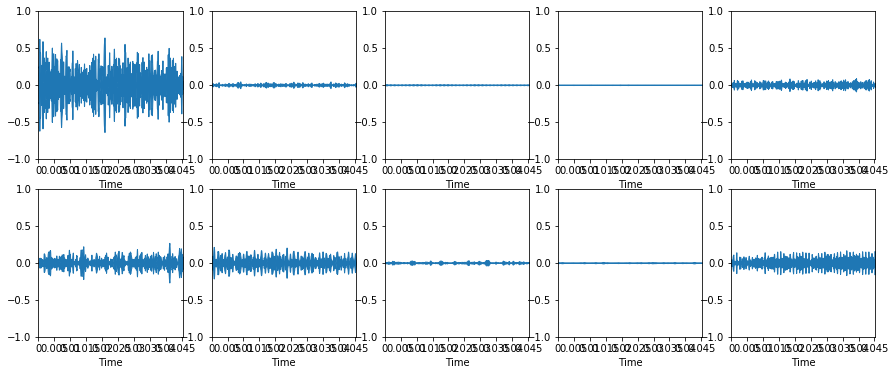

In [5]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(classical):
    plt.subplot(2, 5, i+1)
    librosa.display.waveplot(x[:1000])
    plt.ylim(-1, 1)

ValueError: num must be 1 <= num <= 10, not 11

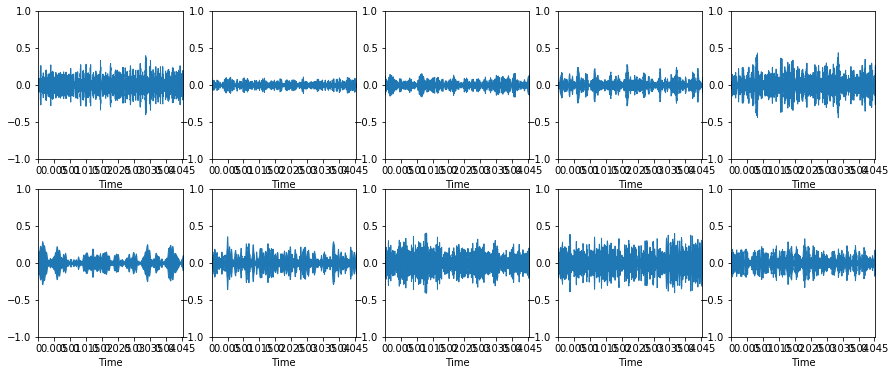

In [6]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(rock):
    plt.subplot(2, 5, i+1)
    librosa.display.waveplot(x[:1000])
    plt.ylim(-1, 1)

In [5]:
def extract_features(signal):
    return [
        np.mean(librosa.feature.zero_crossing_rate(signal)[0]),
        np.mean(librosa.feature.spectral_centroid(signal)[0]),
        np.mean(librosa.feature.spectral_bandwidth(signal)[0]),
        np.mean(librosa.feature.mfcc(signal)[0]),
        np.mean(librosa.feature.rms(signal, center=True))
    ]

In [6]:
classical_features = np.array([extract_features(x) for x in classical])
rock_features = np.array([extract_features(x) for x in rock])
test_features = np.array([extract_features(x) for x in test])

KeyboardInterrupt: 

Text(0, 0.5, 'Count')

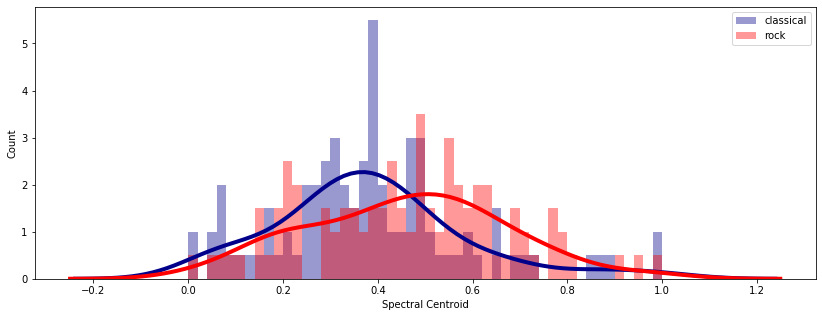

In [43]:
plt.figure(figsize=(14, 5))
sns.distplot(normalize(classical_features[:,1]), hist=True, kde=True, 
             bins=50, color = 'darkblue', 
             kde_kws={'linewidth': 4})
sns.distplot(normalize(rock_features[:,1]), hist=True, kde=True, 
             bins=50, color = 'red', 
             kde_kws={'linewidth': 4})
plt.legend(('classical', 'rock'))
plt.xlabel('Spectral Centroid')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

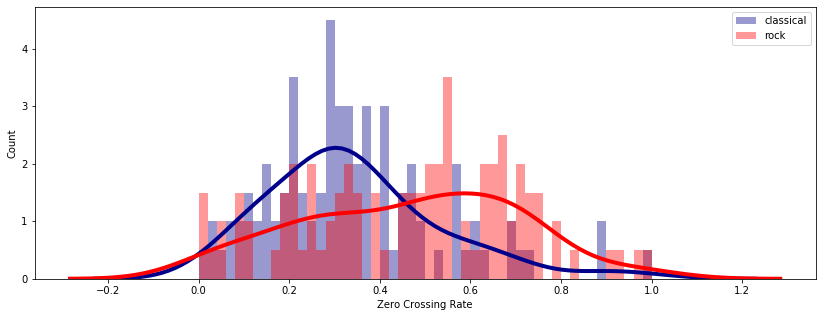

In [44]:
plt.figure(figsize=(14, 5))
sns.distplot(normalize(classical_features[:,0]), hist=True, kde=True, 
             bins=50, color = 'darkblue', 
             kde_kws={'linewidth': 4})
sns.distplot(normalize(rock_features[:,0]), hist=True, kde=True, 
             bins=50, color = 'red', 
             kde_kws={'linewidth': 4})
plt.legend(('classical', 'rock'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

100

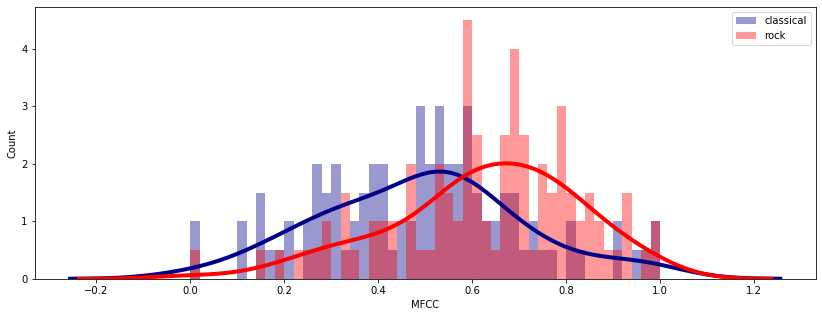

In [46]:
plt.figure(figsize=(14, 5))
sns.distplot(normalize(classical_features[:,3]), hist=True, kde=True, 
             bins=50, color = 'darkblue', 
             kde_kws={'linewidth': 4})
sns.distplot(normalize(rock_features[:,3]), hist=True, kde=True, 
             bins=50, color = 'red', 
             kde_kws={'linewidth': 4})
plt.legend(('classical', 'rock'))
plt.xlabel('MFCC')
plt.ylabel('Count')
classical_features[:,3].size

Text(0, 0.5, 'Count')

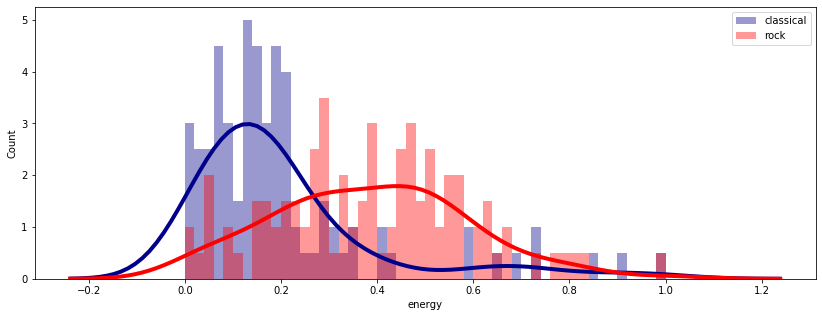

In [47]:
plt.figure(figsize=(14, 5))
sns.distplot(normalize(classical_features[:,4]), hist=True, kde=True, 
             bins=50, color = 'darkblue', 
             kde_kws={'linewidth': 4})
sns.distplot(normalize(rock_features[:,4]), hist=True, kde=True, 
             bins=50, color = 'red', 
             kde_kws={'linewidth': 4})
plt.legend(('classical', 'rock'))
plt.xlabel('energy')
plt.ylabel('Count')

In [36]:
def tempo(signal):
    onset_env = librosa.onset.onset_strength(signal, sr=22050)
    return librosa.beat.tempo(onset_envelope=onset_env, sr=22050)

In [37]:
classical_tempo = np.array([tempo(x) for x in classical])
rock_tempo = np.array([tempo(x) for x in rock])

Text(0, 0.5, 'Count')

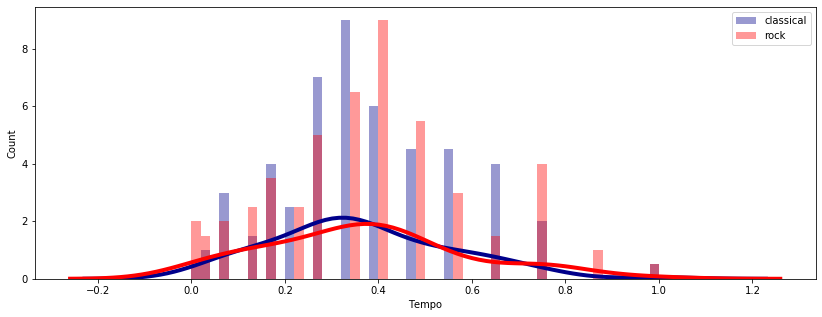

In [38]:
plt.figure(figsize=(14, 5))
sns.distplot(normalize(classical_tempo), hist=True, kde=True, 
             bins=50, color = 'darkblue', 
             kde_kws={'linewidth': 4})
sns.distplot(normalize(rock_tempo), hist=True, kde=True, 
             bins=50, color = 'red', 
             kde_kws={'linewidth': 4})
plt.legend(('classical', 'rock'))
plt.xlabel('Tempo')
plt.ylabel('Count')

In [51]:
feature_classical = pd.DataFrame(classical_features,columns=['zero crossing','spectral centroid',
                                                             'spectral bandwidth','mfcc','rmse'])
feature_classical['category']='classical'
feature_classical

,zero crossing,spectral centroid,spectral bandwidth,mfcc,rmse,category
0,0.115075,1702.263184,1602.833268,-108.035294,0.174157,classical
1,0.051045,876.983429,1108.524563,-392.922913,0.021470,classical
2,0.041282,715.399707,1030.415264,-552.120056,0.006629,classical
3,0.047657,1054.545714,1455.644187,-482.586243,0.008015,classical
4,0.087766,1360.643672,1441.243134,-324.061157,0.030625,classical
...,...,...,...,...,...,...
95,0.098223,1505.166424,1559.005740,-268.195526,0.036245,classical
96,0.074029,1474.667852,1813.115020,-305.431519,0.038937,classical
97,0.081732,1278.513357,1311.796081,-319.223694,0.038927,classical
98,0.087378,1415.261246,1448.739504,-263.966309,0.043002,classical


In [52]:
feature_rock = pd.DataFrame(rock_features,columns=['zero crossing','spectral centroid',
                                                             'spectral bandwidth','mfcc','rmse'])
feature_rock['category']='rock'
feature_rock

,zero crossing,spectral centroid,spectral bandwidth,mfcc,rmse,category
0,0.134644,2796.512171,2891.132555,-82.662270,0.103326,rock
1,0.137634,2568.419537,2345.007775,-203.321243,0.047017,rock
2,0.089227,2008.149458,2106.541053,-153.640961,0.079486,rock
3,0.132403,2632.220428,2550.096822,-156.254913,0.065484,rock
4,0.115567,2294.785907,2207.011478,-88.320221,0.135758,rock
...,...,...,...,...,...,...
95,0.156223,2997.724318,2691.218980,-58.280537,0.138969,rock
96,0.120636,2495.723202,2249.878670,-88.981575,0.154724,rock
97,0.161723,2590.730306,2078.710859,-117.944603,0.089583,rock
98,0.118184,2429.031041,2502.187148,-83.022293,0.120680,rock


In [66]:
final_data = pd.concat([feature_classical,feature_rock]).reset_index()
final_data

,index,zero crossing,spectral centroid,spectral bandwidth,mfcc,rmse,category
0,0,0.115075,1702.263184,1602.833268,-108.035294,0.174157,classical
1,1,0.051045,876.983429,1108.524563,-392.922913,0.021470,classical
2,2,0.041282,715.399707,1030.415264,-552.120056,0.006629,classical
3,3,0.047657,1054.545714,1455.644187,-482.586243,0.008015,classical
4,4,0.087766,1360.643672,1441.243134,-324.061157,0.030625,classical
...,...,...,...,...,...,...,...
195,95,0.156223,2997.724318,2691.218980,-58.280537,0.138969,rock
196,96,0.120636,2495.723202,2249.878670,-88.981575,0.154724,rock
197,97,0.161723,2590.730306,2078.710859,-117.944603,0.089583,rock
198,98,0.118184,2429.031041,2502.187148,-83.022293,0.120680,rock


In [67]:
final_data['category'] = final_data['category'] == 'classical'
final_data

,index,zero crossing,spectral centroid,spectral bandwidth,mfcc,rmse,category
0,0,0.115075,1702.263184,1602.833268,-108.035294,0.174157,True
1,1,0.051045,876.983429,1108.524563,-392.922913,0.021470,True
2,2,0.041282,715.399707,1030.415264,-552.120056,0.006629,True
3,3,0.047657,1054.545714,1455.644187,-482.586243,0.008015,True
4,4,0.087766,1360.643672,1441.243134,-324.061157,0.030625,True
...,...,...,...,...,...,...,...
195,95,0.156223,2997.724318,2691.218980,-58.280537,0.138969,False
196,96,0.120636,2495.723202,2249.878670,-88.981575,0.154724,False
197,97,0.161723,2590.730306,2078.710859,-117.944603,0.089583,False
198,98,0.118184,2429.031041,2502.187148,-83.022293,0.120680,False


In [70]:
X = final_data[['zero crossing', 'spectral centroid','spectral bandwidth', 'mfcc', 'rmse']]
Y = [int(c) for c in final_data['category']]


In [29]:
import librosa
import pandas as pd
import numpy as np
import glob

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import librosa.display
import sklearn
from sklearn import preprocessing

classical_filepath = glob.glob("./Music-data/classical/*.au")
rock_filepath = glob.glob("./Music-data/rock/*.au")
test_filepath = glob.glob("./Music-data/test/*.au")

classical = [librosa.load(track)[0] for track in classical_filepath]
rock = [librosa.load(track)[0] for track in rock_filepath]
test = [librosa.load(track)[0] for track in test_filepath]



def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)


def extract_features(signal):
    return [
        np.mean(librosa.feature.zero_crossing_rate(signal)),
        np.mean(librosa.feature.spectral_centroid(signal)),
        np.mean(librosa.feature.rms(signal, center=True)),
        np.mean(librosa.feature.chroma_stft(signal))
    ]


classical_features = np.array([extract_features(x) for x in classical])
rock_features = np.array([extract_features(x) for x in rock])
test_features = np.array([extract_features(x) for x in test])

feature_classical = pd.DataFrame(classical_features, columns=['zero crossing', 'spectral centroid',
                                                                'rmse', 'chroma'])
feature_classical['category'] = 'classical'
feature_rock = pd.DataFrame(rock_features, columns=['zero crossing', 'spectral centroid',
                                                     'rmse', 'chroma'])
feature_rock['category'] = 'rock'
final_data = pd.concat([feature_classical, feature_rock]).reset_index()

final_data['category'] = final_data['category'] == 'classical'

final_data = final_data.sample(frac=1)

X = final_data[['zero crossing', 'spectral centroid','rmse', 'chroma']]
Y = [int(c) for c in final_data['category']]
X_scaled = normalize(X)

logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_scaled, Y)

test_scaled = normalize(test_features)
prediction = logistic_regressor.predict(test_scaled)
result = pd.DataFrame(test_filepath,columns=['File'])
result['Prediction'] = prediction
print(result)


,File,Prediction
0,./Music-data/test/test2.au,0
1,./Music-data/test/test5.au,0
2,./Music-data/test/test4.au,0
3,./Music-data/test/test1.au,1
4,./Music-data/test/test3.au,0


In [24]:
feature_test = pd.DataFrame(test_features, columns=['zero crossing', 'spectral centroid',
                                                     'rmse', 'chroma'])
feature_test

,zero crossing,spectral centroid,mfcc,chroma
0,0.149561,3045.769505,6.426867,0.495037
1,0.150939,2471.353263,-2.816036,0.416625
2,0.106952,2218.743706,2.562693,0.370018
3,0.094042,1831.993940,-7.099052,0.302456
4,0.124583,2709.304332,7.274594,0.490562


Text(0, 0.5, 'Count')

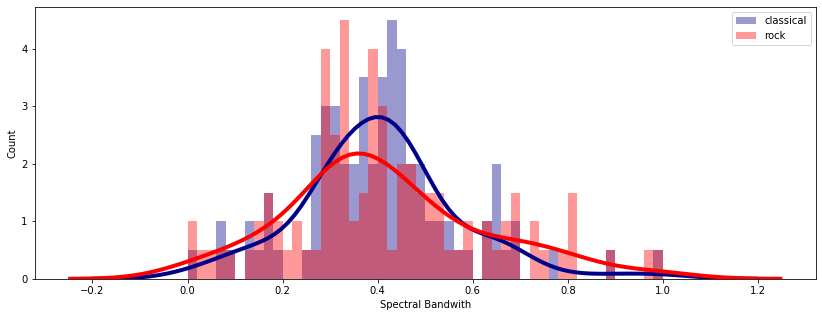

In [75]:
plt.figure(figsize=(14, 5))
sns.distplot(normalize(classical_features[:,2]), hist=True, kde=True, 
             bins=50, color = 'darkblue', 
             kde_kws={'linewidth': 4})
sns.distplot(normalize(rock_features[:,2]), hist=True, kde=True, 
             bins=50, color = 'red', 
             kde_kws={'linewidth': 4})
plt.legend(('classical', 'rock'))
plt.xlabel('Spectral Bandwith')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

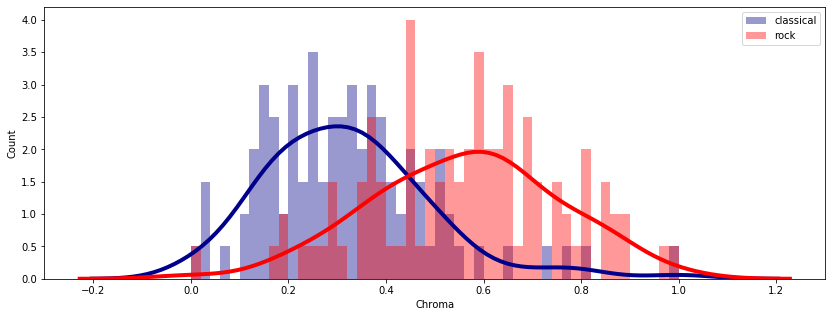

In [76]:
plt.figure(figsize=(14, 5))
sns.distplot(normalize(classical_features[:,5]), hist=True, kde=True, 
             bins=50, color = 'darkblue', 
             kde_kws={'linewidth': 4})
sns.distplot(normalize(rock_features[:,5]), hist=True, kde=True, 
             bins=50, color = 'red', 
             kde_kws={'linewidth': 4})
plt.legend(('classical', 'rock'))
plt.xlabel('Chroma')
plt.ylabel('Count')

In [19]:
np.array(y_test)

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [17]:
logistic_regressor.predict(X_test)

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1])